# Get likes from Instagram-Posts

In [1]:
import requests
from bs4 import BeautifulSoup
import pickle
import pandas as pd
from IPython.display import IFrame, HTML
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from datetime import datetime

In [2]:
# Run Insta-Overview Notebook first !!!
insta_post_embed_links = pickle.load(open("Insta-Overview/instagram-post-embed-links-list.pickle","rb"))

In [3]:
# Last run of Notebook
print(datetime.now().isoformat())

2020-06-02T11:58:12.446590


## Load Instagram Posts

In [4]:
insta_posts_html_path = Path("get-likes-for-instagram-posts/insta_posts_html_list.pickle")
if insta_posts_html_path.exists():
    print("Loading Posts from Cache")
    insta_posts_html = pickle.load(open(insta_posts_html_path,"rb"))
else:
    insta_posts_html = []
    print("Downloading Posts:")
    for i,l in enumerate(insta_post_embed_links,start=1):
        print(f"{i},", end='')
        r = requests.get(l)
        if r.status_code == 200:
            insta_posts_html.append(r.text)
        else:
            raise(Exception("HTTP no success, Statuscode ({r.status_code})"))

    print("\nDownloaded all Posts.")

    pickle.dump(insta_posts_html,open(insta_posts_html_path,"wb"))

Loading Posts from Cache


## Extract Likes and create DataFrame

In [5]:
likes = []

for insta_post in insta_posts_html:
    soup = BeautifulSoup(insta_post, 'html.parser')
    like_string = soup.select("div.SocialProof")[0]
    likes.append(int("".join(like_string.get_text().split(" ")[10].split(",")))) # Parsing for one-time-usage
    
df = pd.DataFrame(zip(likes,insta_post_embed_links),columns=['likes','links'])
df.head(10)

,likes,links
0,22,https://www.instagram.com/p/B_X0N2ZANYw/embed/
1,15,https://www.instagram.com/p/B_X2GNege1r/embed/
2,15,https://www.instagram.com/p/B_X3O7KlHnk/embed/
3,11,https://www.instagram.com/p/B_aQan1FQku/embed/
4,8,https://www.instagram.com/p/B_aNHkwlTTe/embed/
5,10,https://www.instagram.com/p/B_aJo5OFQpw/embed/
6,8,https://www.instagram.com/p/B_XlLUMpJzV/embed/
7,9,https://www.instagram.com/p/B_XlN12plBk/embed/
8,34,https://www.instagram.com/p/B_W-oPwIu8w/embed/
9,33,https://www.instagram.com/p/B_W-nLrITcK/embed/


## Top-n Posts by likes

In [6]:
df = df.sort_values(by='likes',ascending=False)
df.head(10)

,likes,links
46,37,https://www.instagram.com/p/B_znqf9J2kV/embed/
47,36,https://www.instagram.com/p/B_zoVx4JGxA/embed/
48,36,https://www.instagram.com/p/B_zwQVLplbH/embed/
8,34,https://www.instagram.com/p/B_W-oPwIu8w/embed/
9,33,https://www.instagram.com/p/B_W-nLrITcK/embed/
10,33,https://www.instagram.com/p/B_W-l1oIpFA/embed/
111,33,https://www.instagram.com/p/CAdroyeqY__/embed/
0,22,https://www.instagram.com/p/B_X0N2ZANYw/embed/
109,21,https://www.instagram.com/p/CAdoHDHK2Ak/embed/
18,20,https://www.instagram.com/p/B_e75mmhffZ/embed/


## Overview of Like data

In [7]:
df.describe()

,likes
count,122.000000
mean,11.672131
std,6.751116
min,2.000000
25%,8.000000
50%,10.000000
75%,13.000000
max,37.000000


## Post with Lowest and Highest Number of Likes

In [8]:
display(HTML("<h1> Lowest number of likes</h1>"))
display(IFrame(list(df.sort_values(by='likes', ascending=True)['links'])[0], 400, 800))

display(HTML("<h1> Highest number of likes</h1>"))
display(IFrame(list(df.sort_values(by='likes', ascending=False)['links'])[0], 400, 800))

## Plot likes over Posts (over Time) with Linear Regression

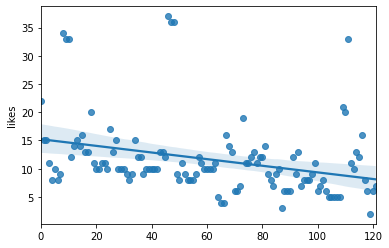

In [9]:
sns.regplot(y=df['likes'],x=df.index)

## Top-n Instagram Posts

In [10]:
for l in list(df['links'])[:10]:
    l_href = l.rsplit("/",2)[0]
    display(HTML(f"<a href='{l_href}'>{l_href}</a>"))
    display(IFrame(l,400,800))
    